## 导入包

In [1]:
from math import log
import operator
from matplotlib import pyplot as plt
%matplotlib notebook

## 计算给定数据集的香农熵

In [2]:
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    # 为所有可能分类创建字典
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
#         labelCounts.get(currentLabel,0)+1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = labelCounts[key]/numEntries
        shannonEnt -= prob*log(prob,2)
    return shannonEnt, labelCounts

In [3]:
def createDataSet():
    dataSet = [[1,1,'yes'],
              [1,1,'yes'],
              [1,0,'no'],
              [0,1,'no'],
              [0,1,'no']]
    labels = ['no surfacing', 'flippers']
    return dataSet, labels

In [4]:
myDat, labels = createDataSet()

In [5]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [6]:
shannonEnt, labelCounts = calcShannonEnt(myDat)

In [7]:
shannonEnt

0.9709505944546686

In [8]:
labelCounts

{'yes': 2, 'no': 3}

In [9]:
myDat[0][-1]='maybe'

In [10]:
shannonEnt,_ = calcShannonEnt(myDat)
shannonEnt

1.3709505944546687

## 划分数据集

In [11]:
def splitDataSet(dataSet,axis,value):
    # 创建新的list对象
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            #抽取
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [12]:
splitDataSet(myDat,0,1)

[[1, 'maybe'], [1, 'yes'], [0, 'no']]

In [13]:
splitDataSet(myDat,0,0)

[[1, 'no'], [1, 'no']]

In [14]:
def chooseBestFeatureToSplit(dataset):
    numFeatures = len(dataset[0])-1
    baseEntropy,_ = calcShannonEnt(dataset)
    bestInfoGain = 0
    bestFeature = -1
    for i in range(numFeatures):
        # 创建唯一的分类标签列表
        featList = [example[i] for example in dataset]
        uniqueVals = set(featList)
        newEntropy = 0
        # 计算每种划分方式的信息熵
        for value in uniqueVals:
            subDataSet = splitDataSet(dataset,i, value)
            prob = len(subDataSet)/len(dataset)
            shannonEnt,_ = calcShannonEnt(subDataSet)
            newEntropy += prob * shannonEnt
        infoGain = baseEntropy -newEntropy
        if (infoGain >bestInfoGain):
            # 计算最好的信息增益
            bestInfoGain = infoGain
            bestFeature = i
        return bestFeature

In [15]:
chooseBestFeatureToSplit(myDat)

0

In [16]:
myDat

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [17]:
def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
            classCount[vote] += 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [18]:
def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet] #数据集所有的类标签
    # 类别相同则停止继续划分
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    # 遍历完所有特征时仍未将数据集划分成唯一类别的分组，则返回出现次数最多的
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    # 得到列表包含的属性值
    del (labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet] #存储已经选择的分类特征值
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet,bestFeat,value), subLabels)
    return myTree

In [19]:
myDat, labels = createDataSet()

In [20]:
myTree = createTree(myDat,labels)

In [21]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

## 绘图

In [22]:
# 定义文本框和箭头格式
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode =dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")
def createPlot():
    fig = plt.figure(1,facecolor='white')
    fig.clf()
    createPlot.ax1 = plt.subplot(111,frameon=False)
    plotNode('decisionNode',(0.5,0.1),(0.1,0.5),decisionNode)
    plotNode('leafNode',(0.8,0.1),(0.3,0.8),leafNode)
    plt.show()

# 绘制带箭头的注解
def plotNode(nodeTxt,centerPt,parentPt,nodeType):
    createPlot.ax1.annotate(nodeTxt,xy=parentPt,xycoords='axes fraction',xytext=centerPt,
                           textcoords='axes fraction',va='center',ha='center',bbox=nodeType,
                           arrowprops=arrow_args)
    

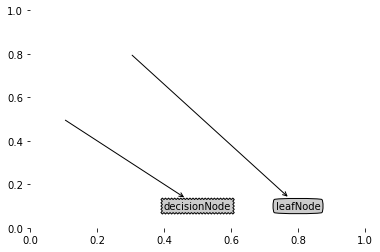

In [23]:
createPlot()